# Autopreis

Wenn man ein Auto verkaufen will, ist es wichtig zu wissen, was das Auto noch Wert ist bzw. welchen Preis man für das Fahrzeug noch verlangen kann. Da viele Menschen aufgrund persönlicher Erlebnisse ihrem Fahrzeug den Wert falsch einschätzen, ist es wichtig, das Fahrzeug objektiv zu bewerten und beispielsweise mit einer Marktanalyse den Wert festzulegen.


Genau dies wurde in diesem Machine-Learning-Projekts zum Ziel gemacht.
Es wird ein Learner programmiert, der den Verkaufspreis von Gebrauchtwagen aufgrund von objektiven Merkmalen wie  Tachostand, Alter etc. auf Basis von Marktdaten bestimmt. Dabei handelt es sich um eine klassische Regressionsaufgabe. Als Prädiktoren dienen die Merkmale des zu bewertenden Fahrzeugs (km-Stand, Treibstoff, Erstzulassung, etc.); die daraus zu bestimmende nummerische Zielgrösse stellt der Verkaufspreis (Wert) dar.$^1$ 

Der in diesem Projekt verwendete Datensatz stammt von Kaggle und beinhaltet die Daten und Preise von über 370'000 Fahrzeugen, die über die Plattform ebay-kleinanzeigen.de angeboten wurden. Der Datensatz kann unter folgendem Link heruntergeladen werden: <br>
https://www.kaggle.com/orgesleka/used-cars-database#autos.csv <br>


**Hinweis:** Der Datensatz  stammt aus dem Jahr 2016. Die vorhergesagten Verkauspreise beziehen sich deshalb auch auf das Jahr 2016.

### Import des Datensatz & erster Überblick über die Daten
Zunächst werden die benötgten Python Pakete importiert und der Datensatz geladen. Um einen ersten Überblick über den Datensatz zu bekommen, werden die ersten paar Zeilen angezeigt:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
sns.set_style("whitegrid")

car_data = pd.read_csv('Data/autos.csv',encoding = 'unicode_escape',index_col=False)
car_data.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Es wird ersichtlich, dass der Datensatz bereits in der gewünschten dritten Normalform als "tidy data" vorliegt und  folgende Merkmale beinhaltet:$^2$
- `dateCrawled`_(datetime)_: Datum & Uhrzeit, wann die Anzeige zum ersten Mal vom Crawler gefunden wurde
- `name`_(Qualitativ, nominal)_: Titel der Anzeige (vom Ersteller der Anzeige frei wählbar)
- `seller`_(Qualitativ, nominal)_: Privatverkäufer (private) oder Händler (dealer)
- `offerType`_(Qualitativ, nominal)_: Angebot (Ersteller möchte bestimmtes Auto verkaufen) oder Gesuch (Ersteller möchte bestimmtes Auto kaufen) 
- `price`_(Quantitativ, diskret)_: angebotener Verkaufspreis in Euro
- `abtest`_(Qualitativ, nominal)_: Ausprägung 'test' oder 'control', eine genaue Bedeutung dieses Merkmals konnte nicht gefunden werden
- `vehicleType`_(Qualitativ, nominal)_: Aufbau des Fahrzeugs (z.B. Coupé, SUV,...)
- `yearOfRegistration`_(Qualitativ, ordinal)_: Jahr der Erstzulassung
- `gearbox`_(Qualitativ, nominal)_: Automatik oder manuelles Getriebe
- `powerPS`_(Quantitativ, diskret)_: Leistung des Fahrzeugs in PS (1 kW = 1.36 PS) als Integer
- `model`_(Qualitativ, nominal)_: Modellbezeichnung
- `kilometer`_(Quantitativ, diskret)_: Kilometerstand als Integer
- `monthOfRegistration`_(Qualitativ, ordinal)_: Monat der Erstzulassung
- `fuelType`_(Qualitativ, nominal)_: Treibstoff für den Motor
- `brand`_(Qualitativ, nominal)_: Hersteller
- `notRepairedDamage`_(Boolean)_: unreparierter Unfallschaden am Fahrzeug
- `dateCreated`_(datetime)_: Datum, wann die Anzeige erstellt wurde
- `nrOfPictures`_(Quantitativ, diskret)_: Anzahl Bilder in der Anzeige als Integer (enthält aufgrund von Fehler bei der Datenerfassung immer 0) 
- `postalCode`_(Qualitativ, nominal)_: Postleitzahl von Standort des Fahrzeugs
- `lastSeenOnline`_(datetime)_: Datum & Uhrzeit, wann die Anzeige zum letzten Mal vom Crawler gefunden wurde

Für den weiteren Verlauf des Projekts wird der Datensatz folgendermassen modifiziert:

- Die Merkmale, `nrOfPictures`, `dateCreated` und `postalCode` sind für das Ziel des Projekts unbedeutend und werden deshalb entfernt.
- Es sollen nur Angebote beachtet werden, die Gesuche werden gelöscht. Dadurch wird das Merkmal `offerType` überflüssig.
- Die Merkmale `dateCrawled`, `lastSeenOnline` stellen Daten und Zeitangaben dar, deshalb werden sie in `datetime` Objekte umgewandelt. Anschliessen wird daraus berechnet wie lange die Anzeige online war. Diese Zeit wird in Sekunden in das Merkmal `timeOnline`(Quantitativ, kontinuierlch) berechnet und die Merkmale `dateCrawled`, `lastSeenOnline` werden entfernt.
- Das Merkmal `notRepairedDamage` stellt eine Boolean-Variable mit den Strings _'Ja'_ und _'Nein'_ dar. Damit das Markmal in Python als Boolean erkannt wird, wird _'Ja'_ durch __True__ und _'Nein'_ durch __False__ ersetzt.
-
- Der Übersichtlichkeit halber wird die Reihenfolge der Merkmale neu definiert.

In [2]:
time_online = pd.to_datetime(car_data.lastSeen)-pd.to_datetime(car_data.dateCrawled)
time_online = time_online.astype('timedelta64[s]')
car_data['timeOnline'] = time_online
car_data.drop(['abtest','nrOfPictures','postalCode','offerType','dateCreated','lastSeen','dateCrawled'], axis=1)
car_data = car_data[car_data.offerType == 'Angebot']
car_data['notRepairedDamage'].replace('ja', True, inplace=True)
car_data['notRepairedDamage'].replace('nein', False, inplace=True)
car_data = car_data[['name','timeOnline','brand','model','vehicleType','kilometer','monthOfRegistration','yearOfRegistration','powerPS','gearbox','fuelType','seller','notRepairedDamage','price']]
print('(Zeilen, Spalten)= ',car_data.shape)
car_data.head()

(Zeilen, Spalten)=  (371516, 14)


,name,timeOnline,brand,model,vehicleType,kilometer,monthOfRegistration,yearOfRegistration,powerPS,gearbox,fuelType,seller,notRepairedDamage,price
0,Golf_3_1.6,1178680.0,volkswagen,golf,NaN,150000,0,1993,0,manuell,benzin,privat,NaN,480
1,A5_Sportback_2.7_Tdi,1176485.0,audi,NaN,coupe,125000,5,2011,190,manuell,diesel,privat,True,18300
2,"Jeep_Grand_Cherokee_""Overland""",1900525.0,jeep,grand,suv,125000,8,2004,163,automatik,diesel,privat,NaN,9800
3,GOLF_4_1_4__3TÜRER,2773.0,volkswagen,golf,kleinwagen,150000,6,2001,75,manuell,benzin,privat,False,1500
4,Skoda_Fabia_1.4_TDI_PD_Classic,492721.0,skoda,fabia,kleinwagen,90000,7,2008,69,manuell,diesel,privat,False,3600


Der Dataframe enthält nun 371516 Angebote mit 15 Merkmalen, wobei aber auch noch einige Merkmale mit `NaN` vorliegen. <br> Deshalb wird in einem nächsten Schritt ausgewertet, wieviele fehlende Werte pro Merkmal vorliegen.

In [3]:
is_NaN = car_data.isna()
is_NaN.sum()

name                       0
timeOnline                 0
brand                      0
model                  20481
vehicleType            37862
kilometer                  0
monthOfRegistration        0
yearOfRegistration         0
powerPS                    0
gearbox                20203
fuelType               33379
seller                     0
notRepairedDamage      72054
price                      0
dtype: int64

Es ist zu sehen, dass die meisten fehlenden Werte beim Merkmal `notRepairedDamage` vorliegen. Eine mögliche Erklärung dafür ist, dass die Anbieter eines Autos ohne Unfallschaden dieses Feld oft gar nicht beachten. Dieses Verhalten kann man auf diversen Autoverkaufsplattformen beobachten. <br> Deshalb werden die NaN für dieses Merkmal in einem ersten Schritt auf __False__ gesetzt. Falls der Learner später aufgrund dessen eine schlechte Performance aufweisen sollte, muss eine andere Lösung für die vielen fehlenden Werte gefunden werden.<br>

Bei den anderen Merkmalen mit fehlenden Werten handelt es sich ausschliesslich um qualititiv nominale Datentypen. Bei diesen können die fehlenden Werte nicht so einfach nachgetragen werden. Deshalb werden die Angebote mit fehlenden Angaben in diesen Merkmalen aus dem Datensatz entfernt.

In [4]:
car_data['notRepairedDamage'].replace(np.nan, False, inplace=True)
car_data.dropna(axis=0,inplace=True)
print('(Zeilen, Spalten) =',car_data.shape)

(Zeilen, Spalten) = (299860, 14)


Nun bleiben noch knapp 300000 Datensätze übrig.

### Exploratory Data Analysis (EDA)

#### Univariate EDA der quantitativen Merkmale
Als Erstes wird eine univariate EDA mit den quantitativen Merkmalen durchgeführt. Dazu werden Histogramme und Boxplots erstellt, und einige wichtge statisitsche Grössen mit dem Befehl `describe` ausgegeben.

Zu Beginn wird die PS-Leistung der einzelnen angebotenenen Fahrzeuge betrachtet:

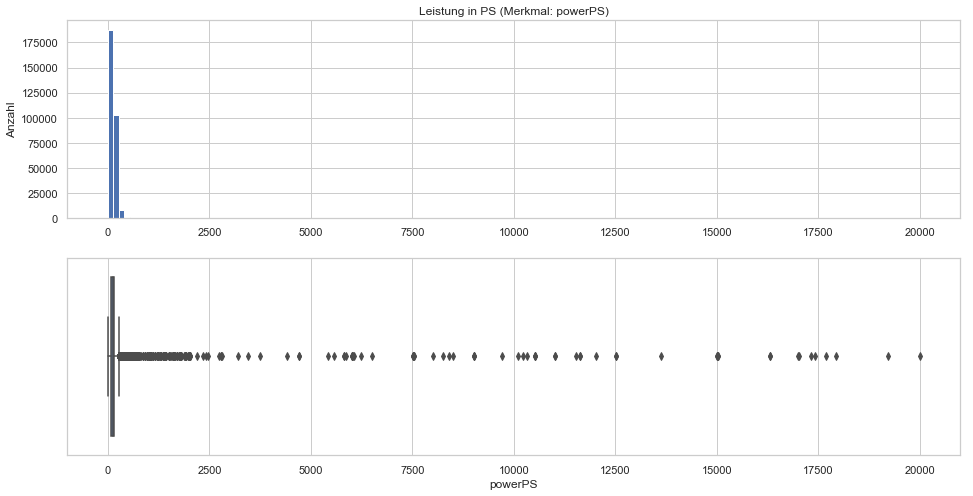

count    299860.000000
mean        123.537544
std         172.039280
min           0.000000
25%          75.000000
50%         114.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [5]:
plt.subplot(2,1,1)
car_data['powerPS'].hist(bins = 150, figsize=(16,8))
plt.title('Leistung in PS (Merkmal: powerPS)') 
plt.ylabel('Anzahl')
plt.subplot(2,1,2)
sns.boxplot(x='powerPS', data = car_data)
plt.show()
car_data['powerPS'].describe()

Es wird ersichtlich, dass sich die Fahrzeugleistung von 0-20'000 PS streckt. Eine Leistung von 0 PS ist nicht möglich und eine Leistung über 1500 PS ist unrealisisch, da diese gerade mal von einem Bugatti Chiron erreicht wird. Es kann also davon augegangen werden, dass bei den betroffenen Angeboten ein Fehler vorliegt.

Deshalb werden Fahrzeuge mit einer Leistung von 0 PS  und einer Leistung über 1500 direkt entfernt.

In [6]:
null_PS = car_data.get(car_data['powerPS'] == 0)
car_data.drop(index = null_PS.index, inplace = True);
ü1500PS = car_data.get(car_data['powerPS'] > 1500)
car_data.drop(index = ü1500PS.index, inplace = True);

Da durch Tippfehler öfters eine Null zu viel an der PS Zahl angehängt wird, werden alle Autos mit über 600 PS nochmals näher angeschaut und auf Plausibilität überprüft. Die Grenze wurde bei 600 PS angesetzt, da die meisten Autos eine Leistung von mehr 60 PS besitzen, aber nur sehr wenige eine von mehr als 600 PS. Daduch ist der Aufwand für die Kontrolle vertretbar.

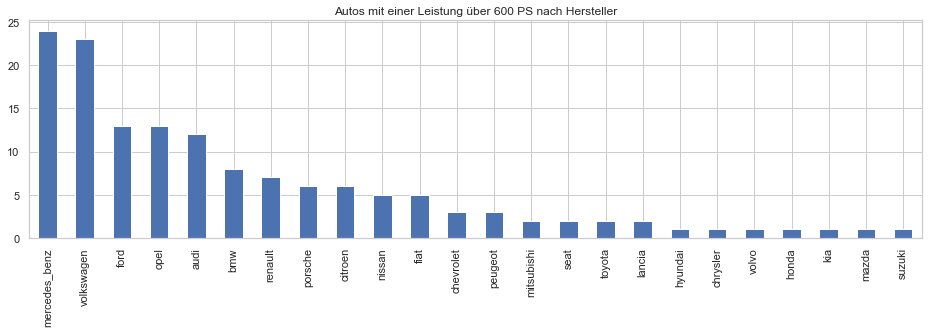

In [7]:
ü600PS = car_data.get(car_data['powerPS'] > 600)
marke_ü600PS = ü600PS['brand'].value_counts(sort=True,normalize=False)
marke_ü600PS.plot('bar',figsize=(16,4)) 
plt.title('Autos mit einer Leistung über 600 PS nach Hersteller');

Von den aufgeführten  Herstellern sind mir nur folgende Autos bekannt, für die eine Leistung über 500 PS  realistisch ist:
- `mercedes_benz`: Modelle von Brabus, Vaeth oder AMG sowie das Modell SLR
- `audi`: Modelle RS6, R8, S8
- `ford`: Modell Mustang
- `bmw`: Modelle M5 oder M6
- `porsche`: Modelle von Techart und 9ff sowie die Modelle GT2, 918 und Carrera GT
- `chevrolet`: Modell Corvette
- `nissan`: Modell GT-R

Alle Einträge mit über 600 PS, die nicht zu den oben genannten Fahrzeugen gehören, werden deshalb gelöscht.

In [8]:
Ausnahmen = 'Brabus|brabus|BRABUS|Vaeth|vaeth|VAETH|Amg|amg|AMG|Slr|slr|SLR|Rs6|rs6|RS6|R8|r8|S8|s8|Mustang|mustang|MUSTANG|M5|m5|M6|m6|Techart|techart|TECHART|9ff|9FF|Gt2|gt2|GT2|918|Carrera_GT|carrera_gt|CARRERA_GT|Corvette|corvettete|CORVETTE|Gtr|gtr|GTR|gt_r|GT_R|gt-r|GT-R'
index = ü600PS.get(ü600PS['name'].str.contains(Ausnahmen)).index
ü600PS = ü600PS.drop(index);
car_data.drop(index = ü600PS.index, inplace = True);

Nun wird von den bereinigten Daten nochmals das Histogramm und der Boxplot  der Leistung geplottet. 

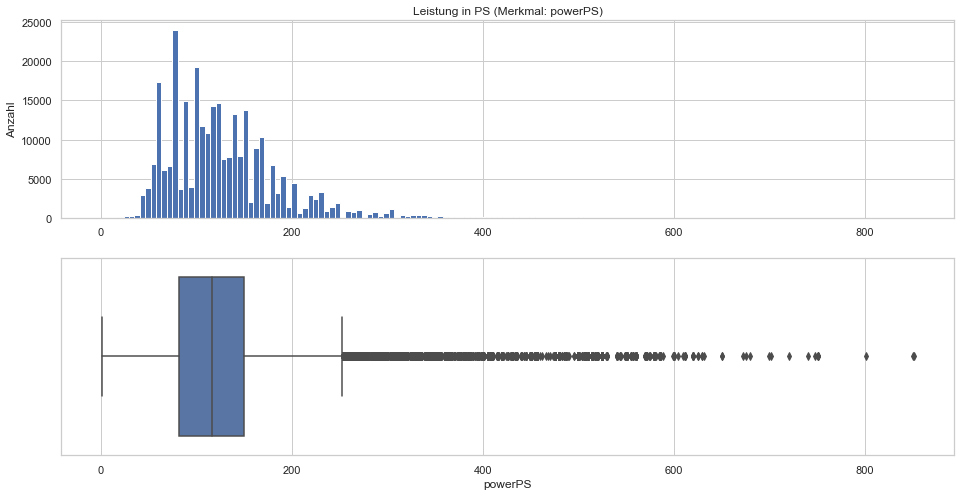

count    283303.000000
mean        127.745322
std          61.572170
min           1.000000
25%          82.000000
50%         116.000000
75%         150.000000
max         851.000000
Name: powerPS, dtype: float64

In [9]:
plt.subplot(2,1,1)
car_data['powerPS'].hist(bins = 150, figsize=(16,8))
plt.title('Leistung in PS (Merkmal: powerPS)') 
plt.ylabel('Anzahl')
plt.subplot(2,1,2)
sns.boxplot(x='powerPS', data = car_data)
plt.show()
car_data['powerPS'].describe()

Als Nächstes werden die Verkaufspreise betrachtet:

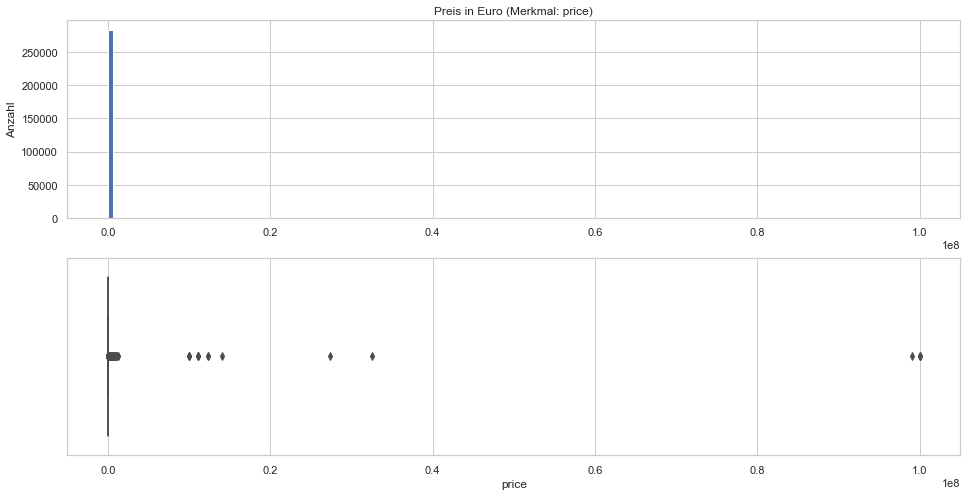

count    2.833030e+05
mean     8.509128e+03
std      3.887201e+05
min      0.000000e+00
25%      1.499000e+03
50%      3.650000e+03
75%      8.390000e+03
max      1.000000e+08
Name: price, dtype: float64

In [10]:
plt.subplot(2,1,1)
car_data['price'].hist(bins = 150, figsize=(16,8))
plt.title('Preis in Euro (Merkmal: price)') 
plt.ylabel('Anzahl')
plt.subplot(2,1,2)
sns.boxplot(x='price', data = car_data)
plt.show()
car_data['price'].describe()

Auch hier ist der Maximalwert und der Minimalwert sicherlich unrealistisch. Die Angebote mit Preis unter 100 Euro werden entfernt, da diese wahrscheinlich keine ganzen Fahrzeuge mehr darstellen oden fehlerhaft sind. Ebenfalls werden Fahrzeuge, die mehr als 5 Millionen Euro kosten, entfernt.

In [11]:
kostet_nix = car_data.get(car_data['price'] < 100)
car_data.drop(index = kostet_nix.index, inplace = True);
kostet_ü5000000 = car_data.get(car_data['price'] > 5000000)
car_data.drop(index = kostet_ü5000000.index, inplace = True);

Die Autos, die mehr als 500'000 Euro kosten, werden ebenfalls noch näher auf Plausibilität untersucht:

In [12]:
kostet_ü500000 = car_data.get(car_data['price'] > 500000)
kostet_ü500000

,name,timeOnline,brand,model,vehicleType,kilometer,monthOfRegistration,yearOfRegistration,powerPS,gearbox,fuelType,seller,notRepairedDamage,price
1846,BMW_M1_Museumsfahrzeug_Neuwagenzustand_Glossy_...,1079902.0,bmw,andere,coupe,20000,12,1980,277,manuell,benzin,privat,False,579000
20143,Porsche_911R_Einer_von_911,186754.0,porsche,911,coupe,5000,3,2016,500,manuell,benzin,privat,False,1250000
26327,Porsche_911_R,0.0,porsche,911,coupe,5000,3,2016,500,manuell,benzin,privat,False,600000
38445,2_VW_Busse_T3,595476.0,volkswagen,transporter,bus,150000,1,1981,70,manuell,benzin,privat,False,999999
45833,Porsche_911_Turbo__930_,599094.0,porsche,911,coupe,150000,1,1981,300,manuell,benzin,privat,False,1000000
53507,Suzuki_SJ_Samurai_413_Van__Kein_Lada_Niva_,2168390.0,suzuki,andere,suv,100000,0,1992,69,manuell,benzin,privat,False,1000000
78480,Porsche_991_R,412596.0,porsche,911,coupe,5000,3,2016,500,manuell,benzin,privat,False,1250000
85047,Porsche_911,0.0,porsche,911,cabrio,5000,12,1967,160,manuell,benzin,privat,False,911911
118058,Audi__A6_allroad_quattro,0.0,audi,andere,kombi,40000,1,2013,245,automatik,diesel,privat,False,517895
118143,Porsche_911_R__500PS__6_Gang__limitiert,104408.0,porsche,911,coupe,5000,3,2016,500,manuell,benzin,privat,False,745000


In dieser Liste sind Preise von über 500'000 Euro nur für die beiden BMW M1, den Porsche Carrera GT und die speziellen Porsche 911 gerechtfertigt. Für die anderen Fahrzeuge ist ein solch hoher Preis nicht realistisch. Folglich werden diese gelöscht.

In [13]:
Ausnahmen = 'BMW_M1|911|Carrera_GT'
index = kostet_ü500000.get(kostet_ü500000['name'].str.contains(Ausnahmen)).index
kostet_ü500000 = kostet_ü500000.drop(index);
car_data.drop(index = kostet_ü500000.index, inplace = True);

Auch hier wird nun nochmals ein Histogramm und ein Boxplot von den bereinigten Daten erstellt.

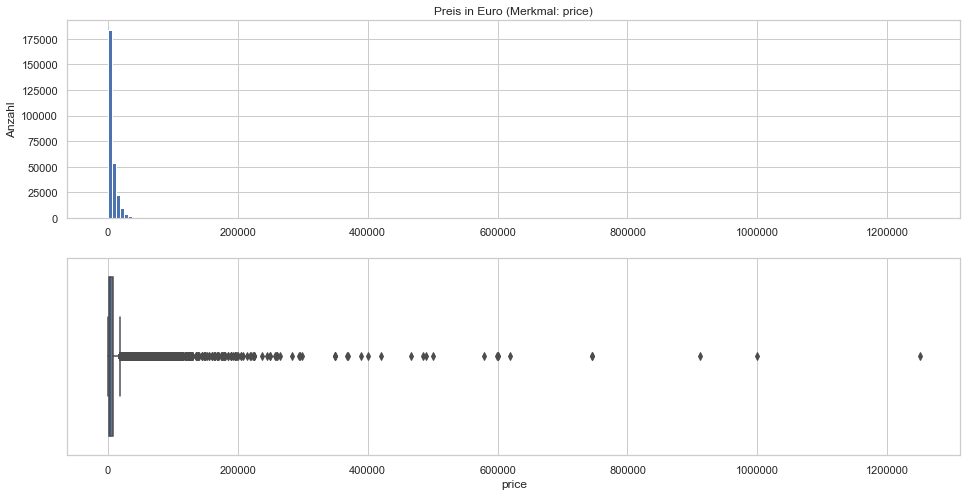

count    2.783560e+05
mean     6.612205e+03
std      1.027569e+04
min      1.000000e+02
25%      1.500000e+03
50%      3.799000e+03
75%      8.500000e+03
max      1.250000e+06
Name: price, dtype: float64

In [14]:
plt.subplot(2,1,1)
car_data['price'].hist(bins = 200, figsize=(16,8))
plt.title('Preis in Euro (Merkmal: price)') 
plt.ylabel('Anzahl')
plt.subplot(2,1,2)
sns.boxplot(x='price', data = car_data)
plt.show()
car_data['price'].describe()

Da die Mehrheit der Autos unter 100'000 Euro kostet, wird für die Autos mit Preisen zwischen 100 und 100'000 Euro noch ein zusätliches Histogramm erstellt, um die Verteilung besser zu sehen.

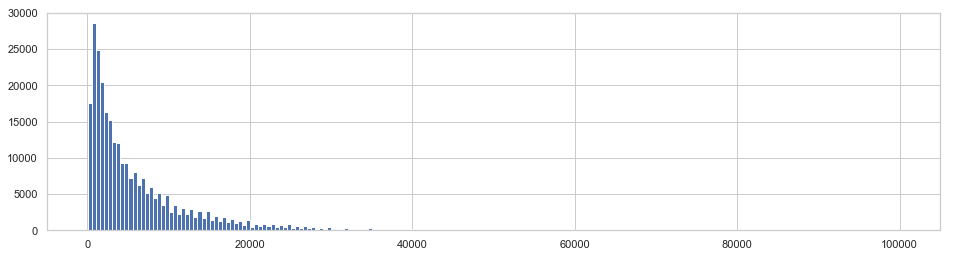

In [15]:
kostet_u40000 = car_data.get(car_data['price'] < 100000)
kostet_u40000['price'].hist(bins = 200, figsize=(16,4));

In einem nächsten Schritt wird ein Histogramm zu den Kilomerterständen geplottet:

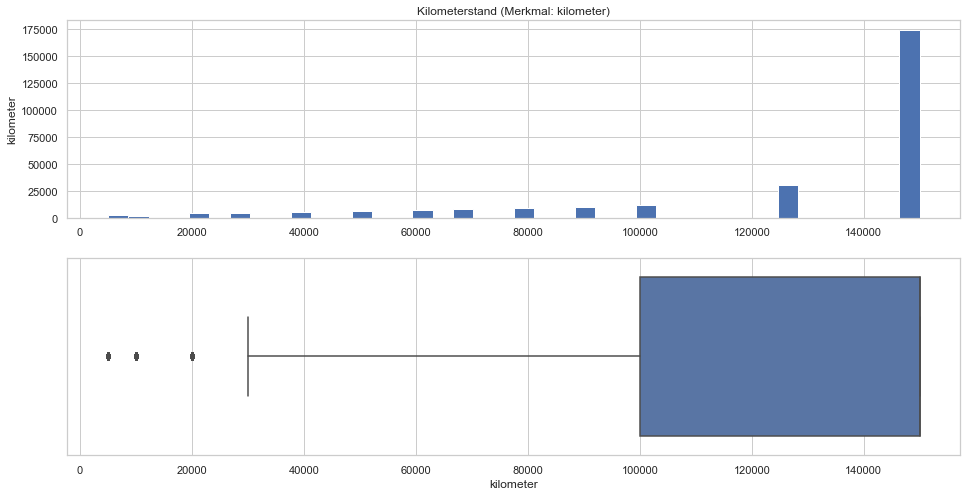

count    278356.000000
mean     124773.527425
std       39438.138790
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [16]:
plt.subplot(2,1,1)
car_data['kilometer'].hist(bins = 40, figsize=(16,8))
plt.title('Kilometerstand (Merkmal: kilometer)') 
plt.ylabel('kilometer')
plt.subplot(2,1,2)
sns.boxplot(x='kilometer', data = car_data)
plt.show()
car_data['kilometer'].describe()

Ebenfalls wurde die Zeit die das Angebot Online war analysiert:

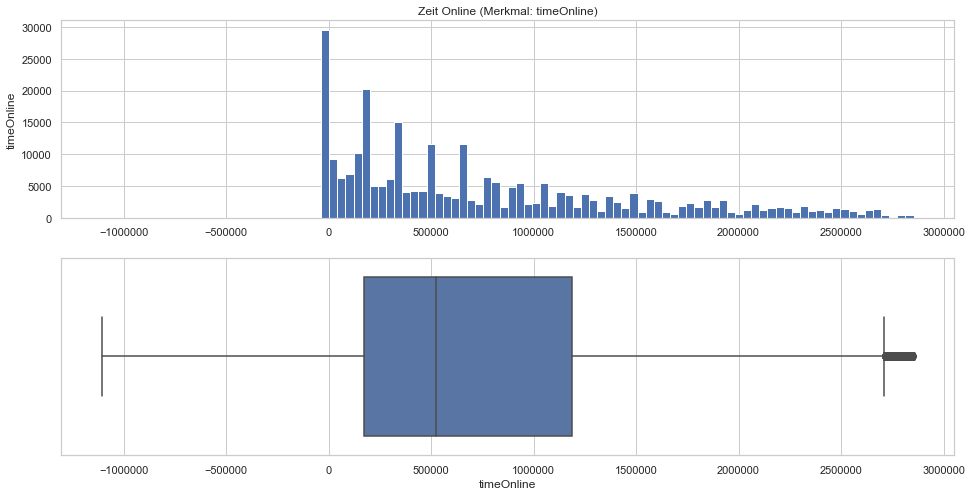

count    2.783560e+05
mean     7.692340e+05
std      7.267172e+05
min     -1.105658e+06
25%      1.751415e+05
50%      5.253350e+05
75%      1.188804e+06
max      2.853834e+06
Name: timeOnline, dtype: float64

In [17]:
plt.subplot(2,1,1)
car_data['timeOnline'].hist(bins = 100, figsize=(16,8))
plt.title('Zeit Online (Merkmal: timeOnline)') 
plt.ylabel('timeOnline')
plt.subplot(2,1,2)
sns.boxplot(x='timeOnline', data = car_data)
plt.show()
car_data['timeOnline'].describe()

Die Angebote welche weniger als 1 Minute Online waren, werden entfernt.

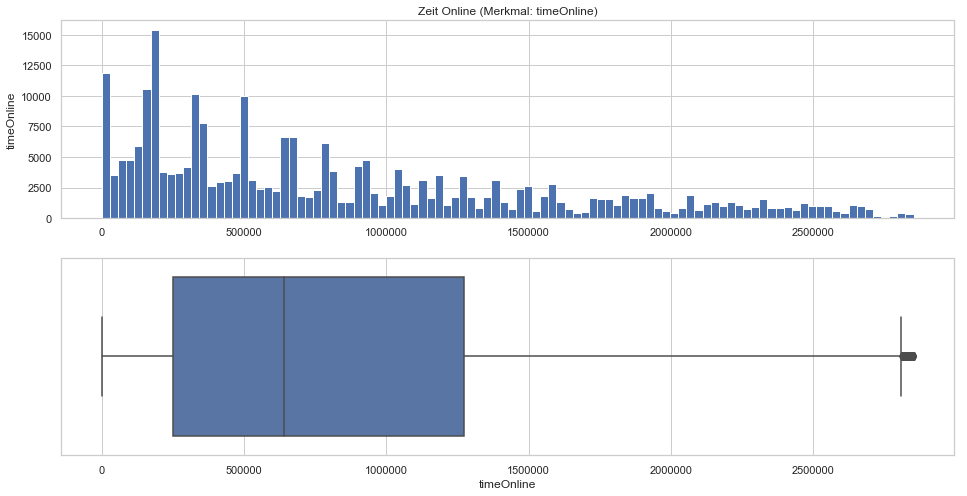

count    2.529000e+05
mean     8.466667e+05
std      7.181285e+05
min      6.600000e+01
25%      2.498088e+05
50%      6.411925e+05
75%      1.274025e+06
max      2.853834e+06
Name: timeOnline, dtype: float64

In [18]:
kurz_online = car_data.get(car_data['timeOnline'] < 60)
car_data.drop(index = kurz_online.index, inplace = True);
plt.subplot(2,1,1)
car_data['timeOnline'].hist(bins = 100, figsize=(16,8))
plt.title('Zeit Online (Merkmal: timeOnline)') 
plt.ylabel('timeOnline')
plt.subplot(2,1,2)
sns.boxplot(x='timeOnline', data = car_data)
plt.show()
car_data['timeOnline'].describe()

Es ist ersichtlich, dass die meisten der angebotenen Fahrzeugen einen Kilometerstand von 150'000 km aufweisen. Dies ist für Gebrauchtwagen durchaus ein realisitscher Wert.

#### Univariate EDA der qualitativen Merkmale
Nun wird die univariate EDA mit den qualitativen Merkmalen weitergeführt.

Zunächst werden die Verteilungen (absoltute Häufigkeit) der verschiedenen Autohersteller und  Aufbauten in Balkendiagrammen dargestellt:

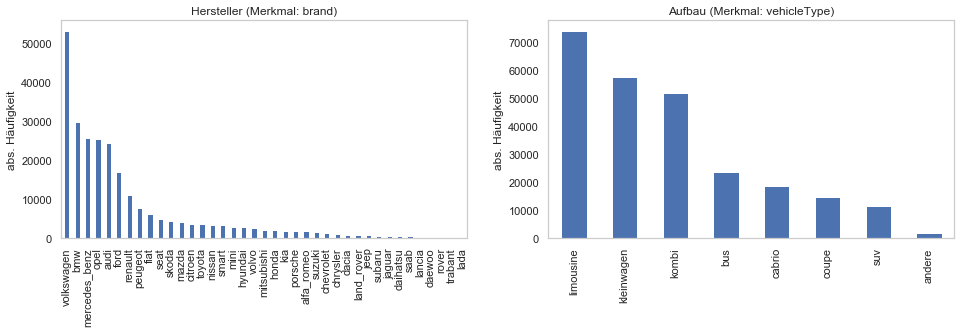

In [19]:
plt.subplot(1,2,1)
haeufigkeit_marken = car_data['brand'].value_counts(sort=True,normalize=False)
haeufigkeit_marken.plot('bar',figsize=(16,4)) 
plt.title('Hersteller (Merkmal: brand)')
plt.grid()
plt.ylabel('abs. Häufigkeit')
plt.subplot(1,2,2)
haeufigkeit_Aufbau = car_data['vehicleType'].value_counts(sort=True,normalize=False)
haeufigkeit_Aufbau.plot('bar',figsize=(16,4)) 
plt.title('Aufbau (Merkmal: vehicleType)')
plt.grid()
plt.ylabel('abs. Häufigkeit')
plt.show()

Es ist zu sehen, dass am meisten Angebote von Fahrzeugen der grossen deutschen Autohersteller VW, Audi, BMW, Mercedes und Opel vorliegen. Dies ist aufgrund der Tatsache, dass es sich um einen auf einer deutschen Website aufgenommenen Datensatz handelt, durchaus realistisch.

Nun wird die absolute Häufigkeit der verschiedenen Modelle ebenfalls in Balkendiagrammen dargestellt. Damit das Ganze übersichtlicher und aussagekräftiger wird, wurden die Modelle der verschiedenen Hersteller jeweils in separaten Diagrammen dargestellt.

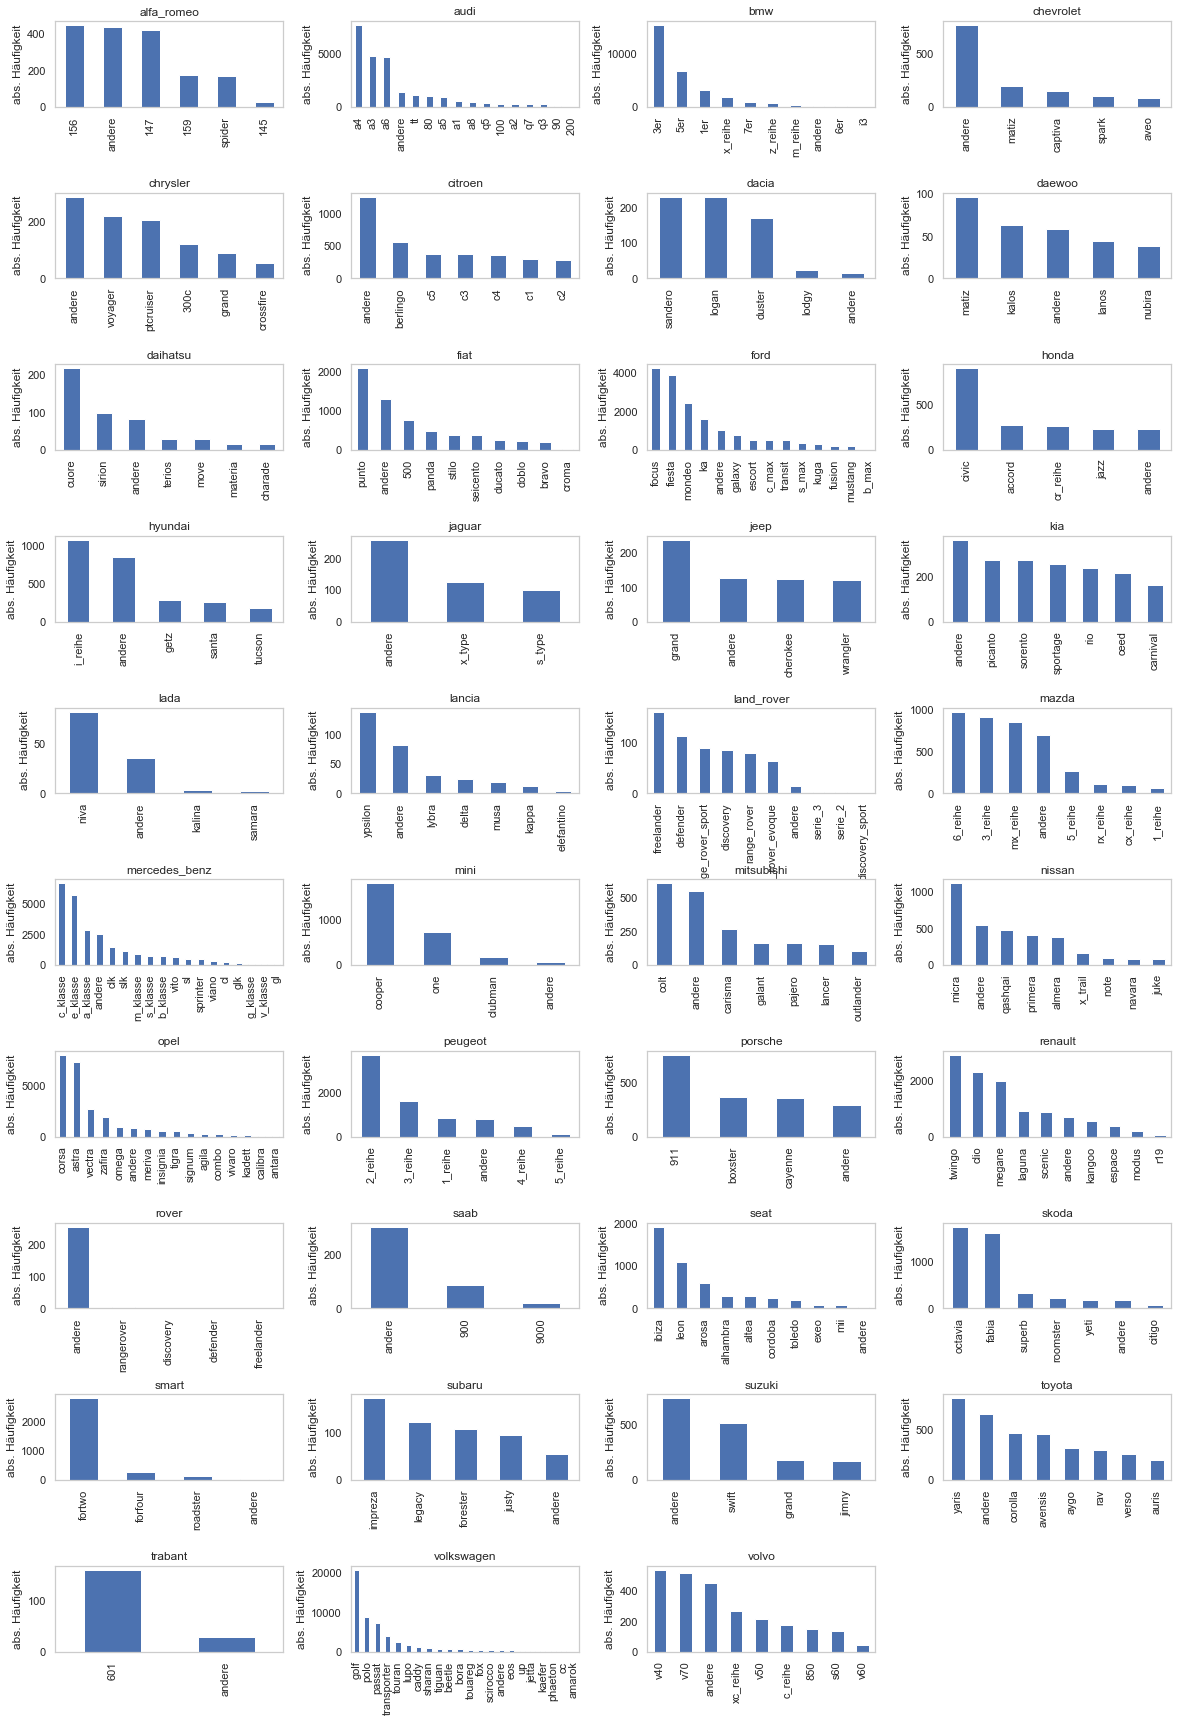

In [20]:
marken = car_data['brand'].unique()
marken = sorted(marken)
for i in range(0,39):
    plt.subplots_adjust(hspace = 1,wspace = 0.3)
    plt.subplot(10,4,i+1)
    data_marke = car_data.groupby('brand').get_group(marken[i])
    Haeufigkeit_modelle = data_marke['model'].value_counts(sort=True,normalize=False)
    Haeufigkeit_modelle.plot('bar',figsize=(20,30))
    plt.title(marken[i])
    plt.grid() 
    plt.ylabel('abs. Häufigkeit')
else:
    plt.show()

Es ist ersichtlich, dass immer nur die am häufigsten angebotenen Modelle eines Herstellers seperat gekennzeichnet sind. Die restlichen erhalten jeweils die Merkmalausprägung 'andere'. 

Nun werden die relativen Verteilungen der Getriebe-, Triebstoff- und Verkäuferarten sowie die Verteilung, ob ein unreparierter Unfallschaden am Fahrzeug vorhanden ist, geplottet:

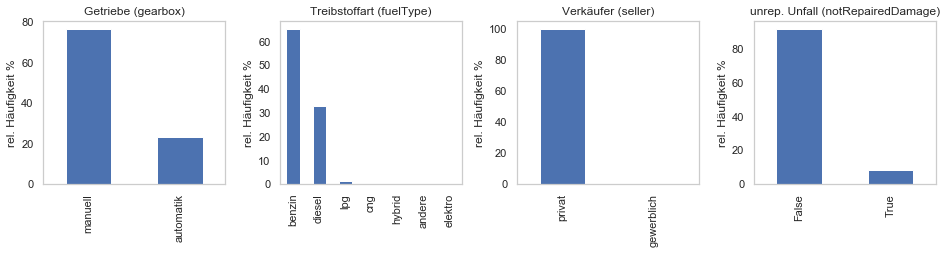

In [21]:
plt.subplots_adjust(hspace = 1,wspace = 0.3)
plt.subplot(1,4,1)
haeufigkeit_Getriebe = 100*car_data['gearbox'].value_counts(sort=True,normalize=True)
haeufigkeit_Getriebe.plot('bar',figsize=(16,3))
plt.title('Getriebe (gearbox)')
plt.grid()
plt.ylabel('rel. Häufigkeit %')
plt.subplot(1,4,2)
haeufigkeit_Treibstoff= 100*car_data['fuelType'].value_counts(sort=True,normalize=True)
haeufigkeit_Treibstoff.plot('bar',figsize=(16,3)) 
plt.title('Treibstoffart (fuelType)')
plt.grid()
plt.ylabel('rel. Häufigkeit %')
plt.subplot(1,4,3)
haeufigkeit_Verkaeufer= 100*car_data['seller'].value_counts(sort=True,normalize=True)
haeufigkeit_Verkaeufer.plot('bar',figsize=(16,3)) 
plt.title('Verkäufer (seller)')
plt.grid()
plt.ylabel('rel. Häufigkeit %')
plt.subplot(1,4,4)
haeufigkeit_Unfall= 100*car_data['notRepairedDamage'].value_counts(sort=True,normalize=True)
haeufigkeit_Unfall.plot('bar',figsize=(16,3)) 
plt.title('unrep. Unfall (notRepairedDamage)')
plt.grid()
plt.ylabel('rel. Häufigkeit %')
plt.show()

Interessant ist, dass fast alle  Angebote von privaten Anbietern stammen. Ebenfalls ist zu sehen, dass alternative Antriebe auf dem Gebrauchtwagenmarkt noch eine untergeordnete Rolle spielen.

Als Letztes werden noch die statistischen Kennwerte der Merkmale `monthOfRegistration` und `yearOfRegistration` auf Plausibilität geprüft.

In [22]:
car_data['monthOfRegistration'].describe()

count    252900.000000
mean          6.139130
std           3.494706
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

Im Datensatz sind Autos vorhanden, die im Monat 0 zugelassen worden sein sollen. Da es keinen solchen Monat gibt, sind diese Inserate wohl fehlerhaft und werden deshalb entfernt.

In [23]:
monat_null = car_data.get(car_data['monthOfRegistration'] == 0)
car_data.drop(index = monat_null.index, inplace = True);

In [24]:
car_data['yearOfRegistration'].describe()

count    243810.000000
mean       2003.413076
std           6.477324
min        1923.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: yearOfRegistration, dtype: float64

Da der Datensatz aus dem Jahr 2016 stammt, ist eine Erstzulassung von später als 2016 nicht glaubhaft. Diese Datensätze werden ebenfalls aus dem DataFrame entfernt.

In [25]:
zu_neu = car_data.get(car_data['yearOfRegistration'] >2016)
car_data.drop(index = zu_neu.index, inplace = True);

#### Multivariate EDA

Nun wird der Zusammenhang zwischen Verkaufspreis und den qualitativen Merkmalen Hersteller und Aufbau je mit einem `stripplot` und einem `boxplot` dargestellt. Die Fahrzeuge mit Automatikgetriebe werden im `stripplot` blau und diejenigen mit Schaltgetriebe orange dargestellt. Da die meisten Autos unter 100'000 Euro kosten, werden jeweils zusätliche Diragramme geplottet, in der nur die Autos bis 100'000 Euro dargestellt werden. So soll die Verteilung dieser Fahrzeuge besser ersichtlich werden. 

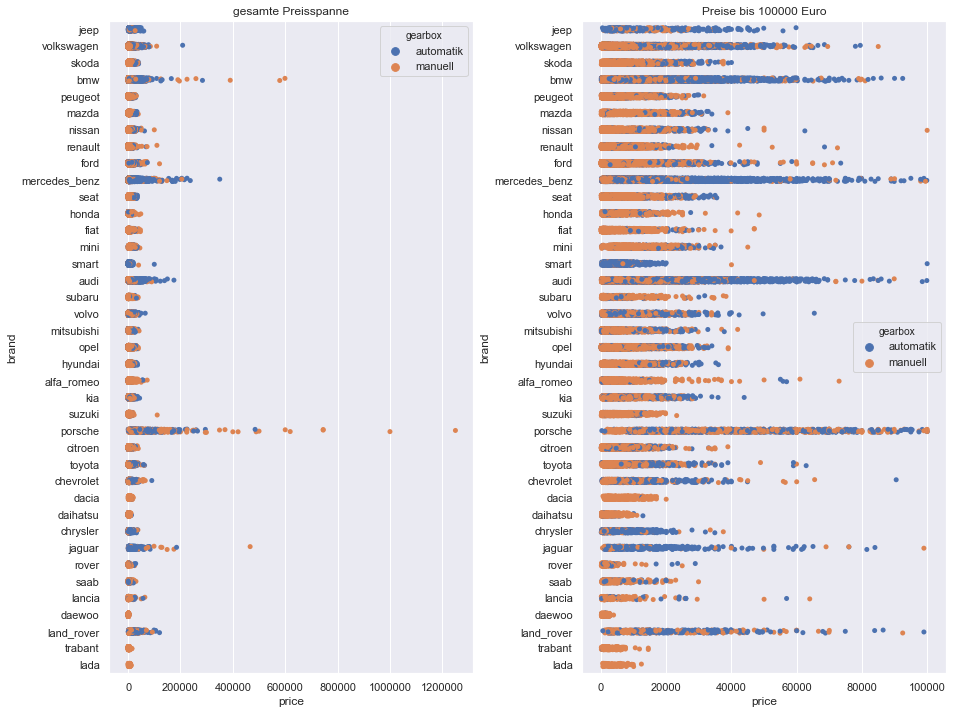

In [27]:
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(15,12)})
sns.stripplot(x='price', y='brand',hue = 'gearbox', data=car_data, jitter = True)
plt.subplots_adjust(wspace = 0.3)
plt.title('gesamte Preisspanne')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(15,12)})
car_data_100000 = car_data.get(car_data['price'] < 100000)
sns.stripplot(x='price', y='brand',hue = 'gearbox', data=car_data_100000, jitter = True)
plt.title('Preise bis 100000 Euro')
plt.show()

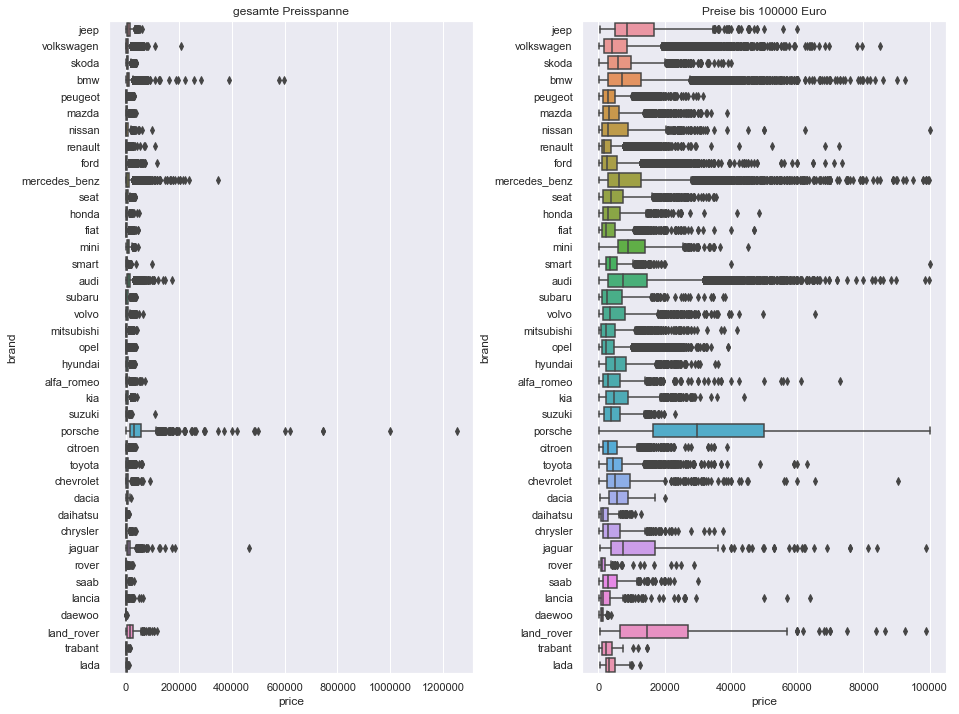

In [28]:
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(x=car_data['price'], y=car_data['brand'])
plt.subplots_adjust(wspace = 0.3)
plt.title('gesamte Preisspanne')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(x=car_data_100000['price'], y=car_data_100000['brand'])
plt.title('Preise bis 100000 Euro')
plt.show()

Es ist erkennbar, dass die Fahrzeuge von Premiumherstellern wie Posche, Audi, Mercedes, etc. tendenziell teurer sind als Hersteller wie beispielsweise Dacia, Smart und Daewoo. Dies ist durchaus realistisch. Ebenfalls kann die Tendenz abgeleitet werden, dass vor allem bei Luxusmarken die Automatikmodelle teurer sind als die mit manuellem Getriebe.

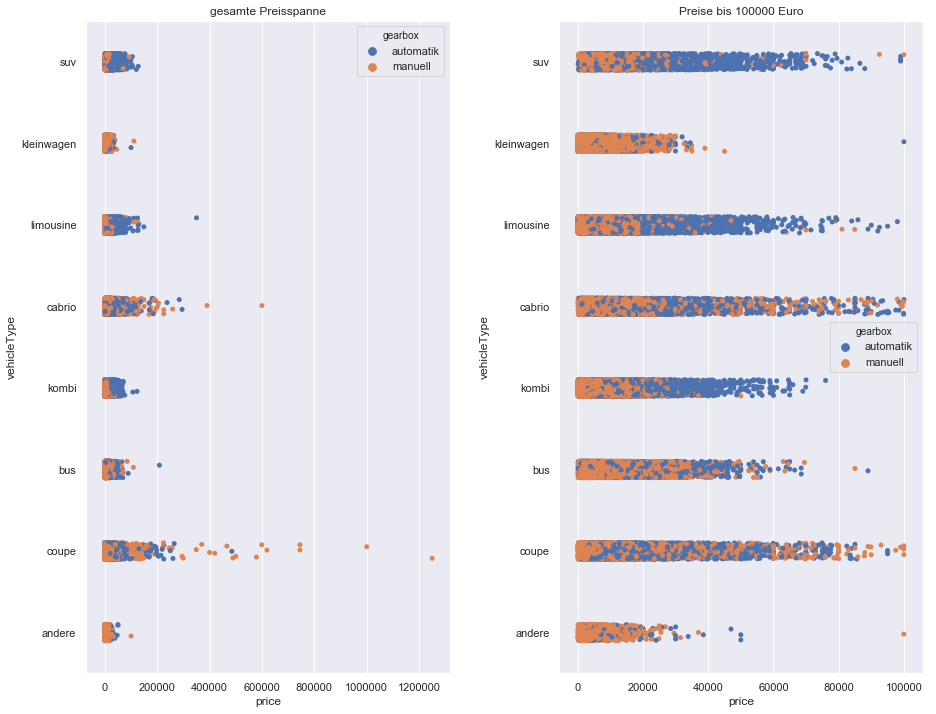

In [29]:
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(15,1)})
sns.stripplot(x='price', y='vehicleType',hue = 'gearbox', data=car_data, jitter = True)
plt.subplots_adjust(wspace = 0.3)
plt.title('gesamte Preisspanne')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(15,1)})
sns.stripplot(x='price', y='vehicleType',hue = 'gearbox', data=car_data_100000, jitter = True)
plt.title('Preise bis 100000 Euro')
plt.show()

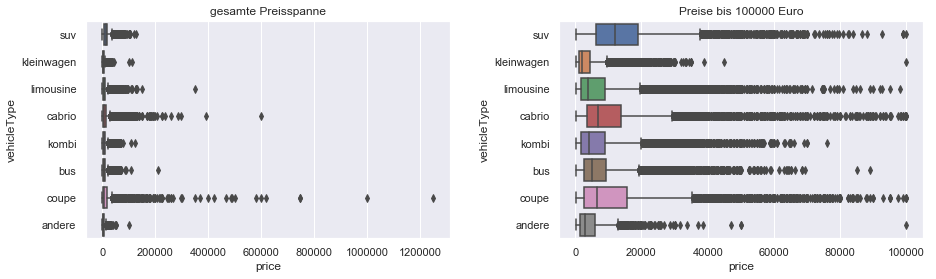

In [31]:
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(15,4)})
sns.boxplot(x=car_data['price'], y=car_data['vehicleType'])
plt.subplots_adjust(wspace = 0.3)
plt.title('gesamte Preisspanne')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(15,4)})
sns.boxplot(x=car_data_100000['price'], y=car_data_100000['vehicleType'])
plt.title('Preise bis 100000 Euro')
plt.show()

Gemäss den obenstehenden Abbildungen ist zu sehen, dass Kleinwagen tendenziell am günsigsten, und Coupé und Cabrios am teuersten sind. Ebenfalls auffallend ist, dass vor allem bei den SUV und den Limousinen Autos mit Automatikgetriebe eher teurer sind, was sich mit vorangehenden Beobachtungen deckt, da diese Fahrzeuglkassen viele Luxusmodelle enthalten.

In einem nächsten Schritt wurde der Zusammenhang zwischen Verkaufspreis und einem allfälligem Unfallschaden sowie der Treibstoffart untersucht:

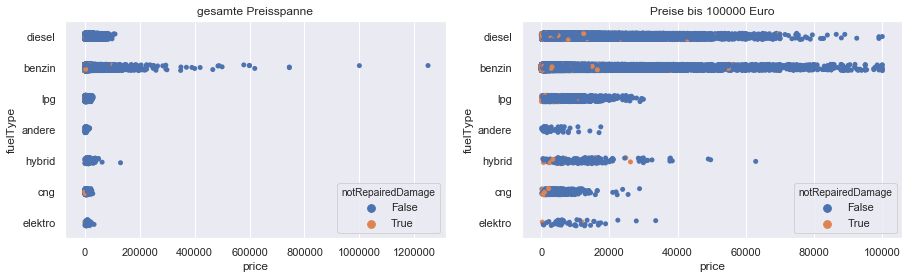

In [32]:
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(15,3)})
sns.stripplot(x='price', y='fuelType', hue = 'notRepairedDamage', data=car_data, jitter = True)
plt.title('gesamte Preisspanne')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(15,3)})
sns.stripplot(x='price', y='fuelType', hue = 'notRepairedDamage', data=car_data_100000, jitter = True)
plt.title('Preise bis 100000 Euro')
plt.show()

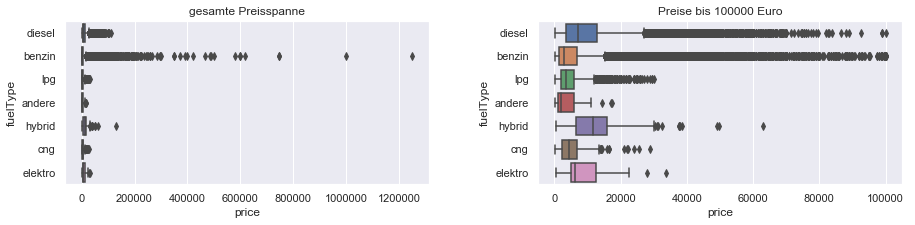

In [33]:
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x=car_data['price'], y=car_data['fuelType'])
plt.subplots_adjust(wspace = 0.3)
plt.title('gesamte Preisspanne')
plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x=car_data_100000['price'], y=car_data_100000['fuelType'])
plt.title('Preise bis 100000 Euro')
plt.show()

Es zeigt sich, dass vor allem hochpreisige Fahrzeuge weniger über alternative Antriebe verfügen. Ebenfalls sind die ganz teuren Fahrzeuge alles Benziner. Gut ersichtlich ist auch, dass Fahrzeuge mit Unfallschaden eher günstig sind.

Zum Abschluss der EDA werden noch die Verkaufspreise gegenüber der Jahre der Erstzulassung, der Leistung, Kilometerzahl und der Zeit die das Angebot Online war in Scatter-Plots gegenübergestellt:

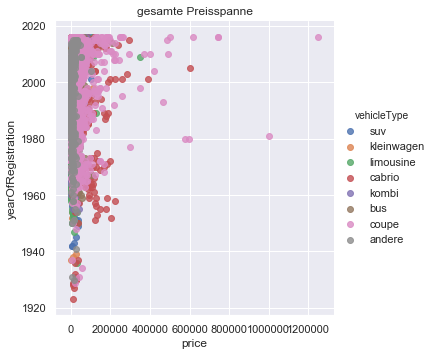

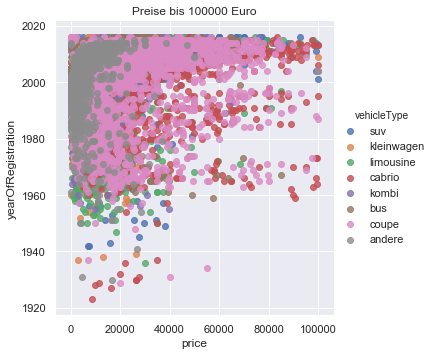

In [34]:
sns.lmplot(x='price', y='yearOfRegistration', hue = 'vehicleType', data=car_data, fit_reg=False)
plt.title('gesamte Preisspanne')
sns.lmplot(x='price', y='yearOfRegistration', hue = 'vehicleType', data=car_data_100000, fit_reg=False)
plt.title('Preise bis 100000 Euro')
plt.show()

Es ist die Tendenz ersichtlich, dass die Preise für die Autos mit zunehmenden Alter abnehmen. Allerdings gibt es auch  Young- & Oldtimer, deren Preise immer noch hoch sind.

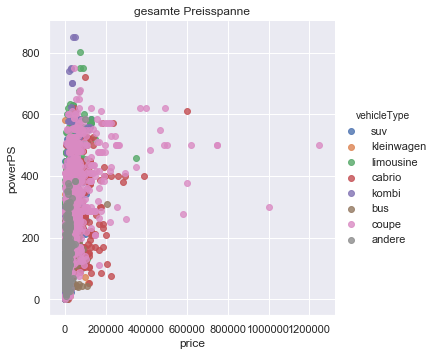

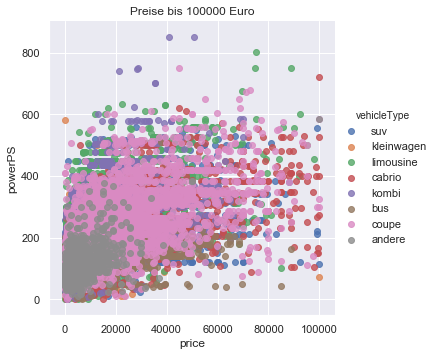

In [36]:
sns.lmplot(x='price', y='powerPS', hue = 'vehicleType', data=car_data, fit_reg=False)
plt.title('gesamte Preisspanne')
sns.lmplot(x='price', y='powerPS', hue = 'vehicleType', data=car_data_100000, fit_reg=False)
plt.title('Preise bis 100000 Euro')
plt.show()

Hier ist es schwierig, aufgrund der Verteilung eine Tendenz zu erkennen.

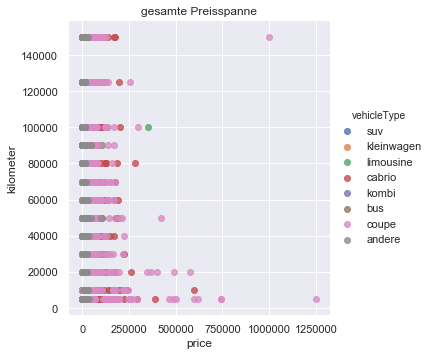

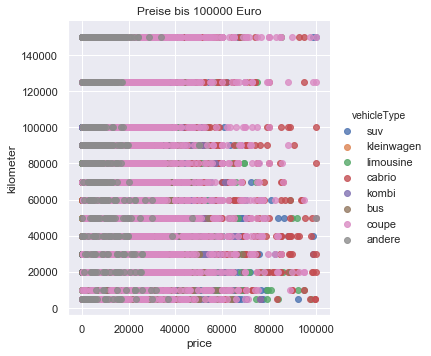

In [38]:
sns.lmplot(x='price', y='kilometer', hue = 'vehicleType', data=car_data, fit_reg=False)
plt.title('gesamte Preisspanne')
sns.lmplot(x='price', y='kilometer', hue = 'vehicleType', data=car_data_100000, fit_reg=False)
plt.title('Preise bis 100000 Euro')
plt.show()

Die Kilometeranzahl hat, wie der Plot zeigt, auf den Wert im allgemeinen keinen grossen Einfluss. Ein Vergleich mit dem Scatter-Plot der Erstzulasung lässt den Schluss zu, dass der Wert eines Fahrzeugs eher vom Alter als von der Kilometeranzahl abhängt.

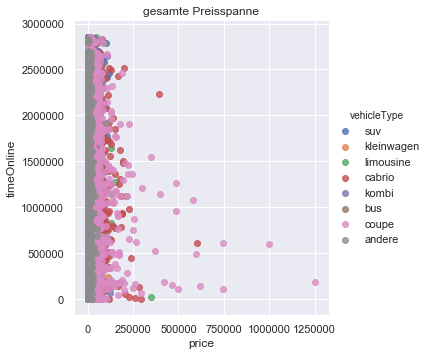

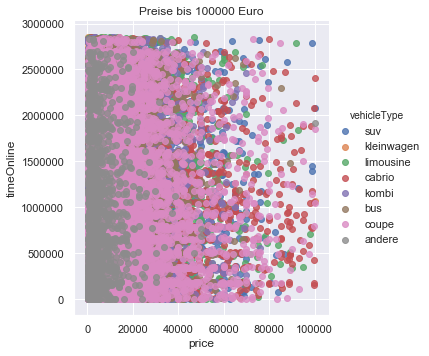

In [39]:
sns.lmplot(x='price', y='timeOnline', hue = 'vehicleType', data=car_data, fit_reg=False)
plt.title('gesamte Preisspanne')
sns.lmplot(x='price', y='timeOnline', hue = 'vehicleType', data=car_data_100000, fit_reg=False)
plt.title('Preise bis 100000 Euro')
plt.show()

Tendentiell lässt sich sagen, dass die Autos, die lange online sind, eher zu günstigeren Preisen verkauft werden. Dies kann auch durch eine allfällige Preissenkung erklärt werden, welche oft durchgeführt wird, wenn ein Auto länger nicht verkauft werden konnte. 

## Data Transformation

Der verwendete Datensatz enthält neben einigen quantitativen (numerische) Merkmalen auch viele qualtitative Merkmale. Diese beiden Merkmaltypen müssen für die nachfolgenden Regressionalgorithmen unterschiedlich vorbereitet werden:

- Die quantitativen Merkmale werden auf eine einheitliche Skala transformiert und die Schiefe der Daten wird reduziert, damit die Daten ungefähr symmetrisch vorliegen.
- Die qualitativen Merkmale müssen codiert werden, damit der Algorithmus auch auf diese Merkmale angewendet werden kann.

Da nun die Datenvorverarbeitung nicht für alle Merkmale gleich ist und beispielsweise ein `StandardScaler` keine qualitativen Merkmale im Datansatzt akzeptiert, wurde darauf verzichtet, die Datentransformation in eine Pipeline aufzunehmen. 

Der Datansatz wird manuell in die quantitativen und die qualitativen Merkmale geteilt, die beiden Teildatensäte  transformiert bzw. codiert und anschliessend wieder zusammengeführt.

Vor der Vorbereitung des Datensatzes, wird dieser noch in 2 Teildatansätze, einen Trainingsdatensatz (enthält 80% der Daten) und einen Testdatensatz (enthält 20% der Daten) getrennt:

In [40]:
from sklearn.model_selection import train_test_split
car_data.set_index('name', drop=True, inplace=True)
car_data_train, car_data_test = train_test_split(car_data, test_size=0.2, random_state=0)
print('Trainingsdatensatz:',car_data_train.shape[0],'Einträge')
print('Testdatensatz:',car_data_test.shape[0],'Einträge')

Trainingsdatensatz: 195040 Einträge
Testdatensatz: 48761 Einträge


### Skalierung & Tranformation der numerischen Merkmale

Die nummerischen Merkmale `timeOnline`,`kilometer`,`powerPS`, und `price` werden mit dem `StandardScaler` standardisiert. Die Standardisierung erfolgt nach der folgenden Formel:

$ \tilde{x}_i= \frac{x_i-\bar{x}} {s_x} $

Somit wird sichergestellt, dass sich alle nummerischen Merkmale in der gleichen Grössenordnung befinden.
Dazu werden die nummerischen Merkmale des DataFrame separat abgespeichert und das Merkmal `Name` wird als Index gesetzt.

In [41]:
car_data_train_num = car_data_train[['timeOnline','kilometer','powerPS','price']]
car_data_test_num = car_data_test[['timeOnline','kilometer','powerPS','price']]

Nun kann der `StandardScaler` angewendet werden. Die Parameter des Skalierers werden mit dem Trainingsdatensatzt gefittet und dann auf beide Datansätze (Trainings- und Testdatensatz) angewendet:

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(car_data_train_num.astype(float)); # Parameter fitten

car_data_train_num_trans = scaler.transform(car_data_train_num.astype(float));
car_data_train_num_trans = pd.DataFrame(car_data_train_num_trans, columns=car_data_train_num.columns, index=car_data_train_num.index)
car_data_test_num_trans = scaler.transform(car_data_test_num.astype(float));
car_data_test_num_trans = pd.DataFrame(car_data_test_num_trans, columns=car_data_test_num.columns, index=car_data_test_num.index)

Um zu sehen, was der `StandardScaler` bewirkt, werden die Histogramme der Trainingsdaten geplottet:

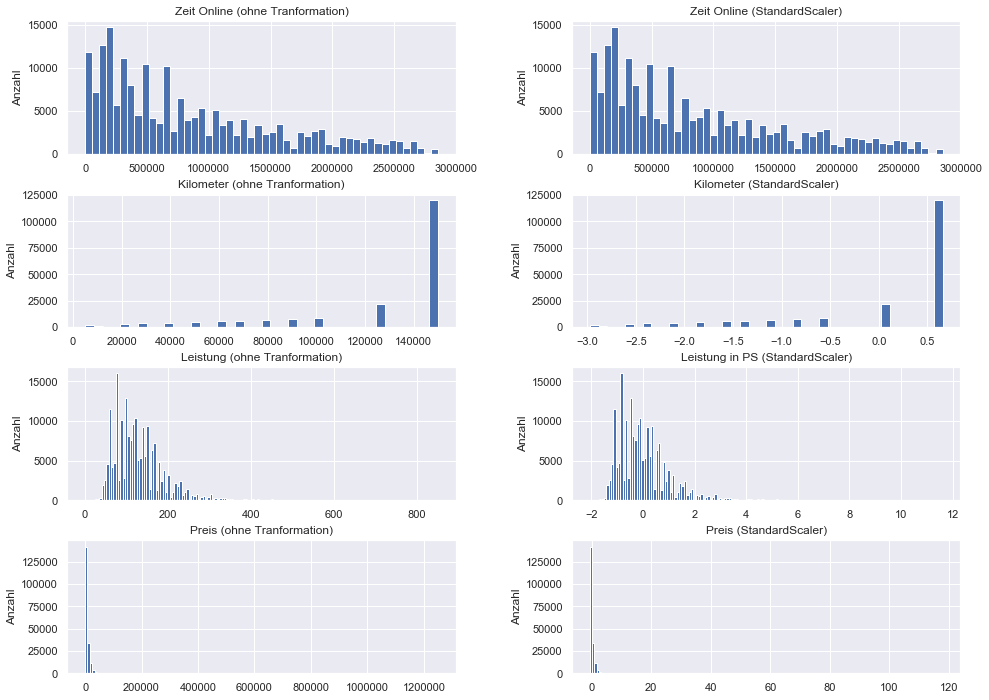

In [43]:
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
plt.subplot(4,2,1)
car_data_train_num['timeOnline'].hist(bins = 50, figsize=(16,12))
plt.title('Zeit Online (ohne Tranformation)') 
plt.ylabel('Anzahl')
plt.subplot(4,2,2)
car_data_train_num['timeOnline'].hist(bins = 50, figsize=(16,12))
plt.title('Zeit Online (StandardScaler)') 
plt.ylabel('Anzahl')

plt.subplot(4,2,3)
car_data_train_num['kilometer'].hist(bins = 40, figsize=(16,12))
plt.title('Kilometer (ohne Tranformation)')
plt.ylabel('Anzahl')
plt.subplot(4,2,4)
car_data_train_num_trans['kilometer'].hist(bins = 40, figsize=(16,12))
plt.title('Kilometer (StandardScaler)') 
plt.ylabel('Anzahl')

plt.subplot(4,2,5)
car_data_train_num['powerPS'].hist(bins = 150, figsize=(16,12))
plt.title('Leistung (ohne Tranformation)') 
plt.ylabel('Anzahl')
plt.subplot(4,2,6)
car_data_train_num_trans['powerPS'].hist(bins = 150, figsize=(16,12))
plt.title('Leistung in PS (StandardScaler)') 
plt.ylabel('Anzahl')

plt.subplot(4,2,7)
car_data_train_num['price'].hist(bins = 150, figsize=(16,12))
plt.title('Preis (ohne Tranformation)') 
plt.ylabel('Anzahl');
plt.subplot(4,2,8)
car_data_train_num_trans['price'].hist(bins = 150, figsize=(16,12))
plt.title('Preis (StandardScaler)') 
plt.ylabel('Anzahl')
plt.show()

Es ist zu sehen, dass sich der Bereich, in dem die Werte sich befinden, stark verkleinert hat. Auch befindet sich der Grossteil der Werte in der Nähe von Null.

In einem nächsten Schritt soll die Schiefe der Daten mit dem `PowerTransformer` verringert werden, damit die Daten symmetrischer sind.

In [44]:
print('Ursprüngliche Schiefe der Trainingsdaten:')
print(car_data_train_num_trans.skew())

Ursprüngliche Schiefe der Trainingsdaten:
timeOnline     0.889055
kilometer     -1.350119
powerPS        1.711265
price         26.068124
dtype: float64


In [45]:
from sklearn.preprocessing import PowerTransformer
PowTrans = PowerTransformer()
PowTrans = PowTrans.fit(car_data_train_num_trans) # Parameter fitten
car_data_train_num_Ptrans = PowTrans.transform(car_data_train_num_trans)
car_data_train_num_Ptrans = pd.DataFrame(car_data_train_num_Ptrans, columns=car_data_train_num.columns, index=car_data_train_num.index)
print('Schiefe nach der Tranformation der Trainingsdaten:')
print(car_data_train_num_Ptrans.skew())
car_data_test_num_Ptrans = PowTrans.transform(car_data_test_num_trans)
car_data_test_num_Ptrans = pd.DataFrame(car_data_test_num_Ptrans, columns=car_data_test_num.columns, index=car_data_test_num.index)


Schiefe nach der Tranformation der Trainingsdaten:
timeOnline    0.172470
kilometer    -0.644816
powerPS       0.065751
price         0.307230
dtype: float64


Um die Wirkung des `PowerTransformer` zu visualisieren, werden die Histogramme der Trainingsdaten vor  und nach der Transformation geplottet:

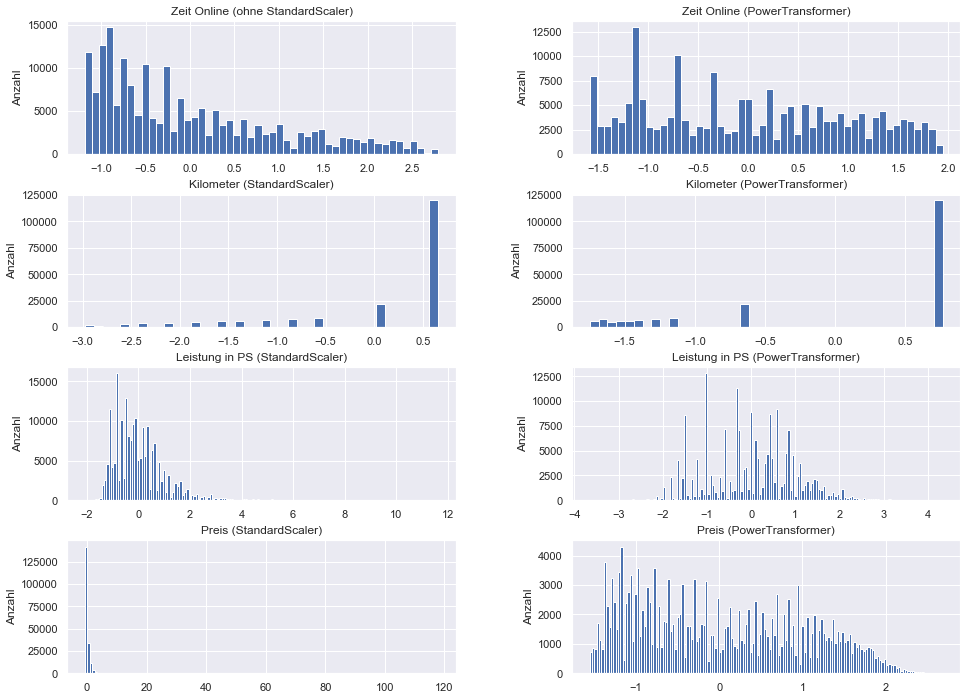

In [46]:
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
plt.subplot(4,2,1)
car_data_train_num_trans['timeOnline'].hist(bins = 50, figsize=(16,12))
plt.title('Zeit Online (ohne StandardScaler)') 
plt.ylabel('Anzahl')
plt.subplot(4,2,2)
car_data_train_num_Ptrans['timeOnline'].hist(bins = 50, figsize=(16,12))
plt.title('Zeit Online (PowerTransformer)') 
plt.ylabel('Anzahl')

plt.subplot(4,2,3)
car_data_train_num_trans['kilometer'].hist(bins = 40, figsize=(16,12))
plt.title('Kilometer (StandardScaler)') 
plt.ylabel('Anzahl')
plt.subplot(4,2,4)
car_data_train_num_Ptrans['kilometer'].hist(bins = 40, figsize=(16,12))
plt.title('Kilometer (PowerTransformer)') 
plt.ylabel('Anzahl')

plt.subplot(4,2,5)
car_data_train_num_trans['powerPS'].hist(bins = 150, figsize=(16,12))
plt.title('Leistung in PS (StandardScaler)') 
plt.ylabel('Anzahl')
plt.subplot(4,2,6)
car_data_train_num_Ptrans['powerPS'].hist(bins = 150, figsize=(16,12))
plt.title('Leistung in PS (PowerTransformer)') 
plt.ylabel('Anzahl')

plt.subplot(4,2,7)
car_data_train_num_trans['price'].hist(bins = 150, figsize=(16,12))
plt.title('Preis (StandardScaler)') 
plt.ylabel('Anzahl')
plt.subplot(4,2,8)
car_data_train_num_Ptrans['price'].hist(bins = 150, figsize=(16,12))
plt.title('Preis (PowerTransformer)') 
plt.ylabel('Anzahl')
plt.show()

### Encoding der qualitativen Merkmale

Da nun die Transformation der quantitativen Merkmale abgeschlossen ist, werden als nächstes die qualitativen Merkmale codiert. Dazu werden aus dem ursprünglichen Trainings- und Testdatensatz die ordinalen und die nominalen qualitativen Daten in separate Dataframes abgespeichert:

In [47]:
car_data_train_ord = car_data_train[['monthOfRegistration','yearOfRegistration','notRepairedDamage']]
car_data_test_ord = car_data_test[['monthOfRegistration','yearOfRegistration','notRepairedDamage']]
car_data_train_nom = car_data_train[['brand','model','vehicleType','gearbox','fuelType','seller']]
car_data_test_nom = car_data_test[['brand','model','vehicleType','gearbox','fuelType','seller']]

Bei den ordinalen Merkmalen `monthOfRegistration`,`yearOfRegistration`,`notRepairedDamage` liegen die ersten beiden Mekmale bereits als Zahlen vor. Deshalb wird nur der Boolean `notRepairedDamage` so codiert, dass gilt: True = 1, False = 0.

In [49]:
car_data_train_ord['notRepairedDamage'].replace(True, 1, inplace=True)
car_data_train_ord['notRepairedDamage'].replace(False, 0, inplace=True)
car_data_test_ord['notRepairedDamage'].replace(True, 1, inplace=True)
car_data_test_ord['notRepairedDamage'].replace(False, 0, inplace=True)

Auf den nominalen Merkmalen wird ein One-Hot Coding durchgeführt:

In [50]:
size_train = car_data_train_nom.shape[0]
car_data_nom = car_data_train_nom.append(car_data_test_nom,sort=False)
car_data_nom = pd.get_dummies(car_data_nom)
car_data_train_nom = car_data_nom.iloc[:size_train]
car_data_test_nom = car_data_nom.iloc[size_train:]

## Geeignete Learner:

Da es sich bei dieser Machine Learning Aufgabe um eine klassische multivariate Regressionsaufgabe handelt und gemäss dem "No Free Lunch-Theorem" nicht vorausgesagt werden kann, welches Verfahren sich für die Vorhersage der Preise am besten eignet, werden folgende drei Verfahen angewendet und miteinander verglichen:

- Multivariate lineare Regression
- Multivariate polynominale Regression
- Random Forest Regresson


## Multivariate Lineare Regression
Für die Regession wird der gesamte Datensatz wieder zusammengesetzt. Danach wird aus dem Datensatz eine Matrix X (mit den Prädiktoren) und ein Vektor y, der die vorherzusagenden Ergebnisse (Verkaufspreise) enthält, erstellt. Dies wird sowohl auf den Trainings- wie auch auf den Testdaten gemacht.

In [51]:
car_data_train_mod= pd.concat([car_data_train_num_Ptrans, car_data_train_ord, car_data_train_nom], axis=1, join='inner')
X_train = car_data_train_mod.drop(['price'], axis=1)
y_train = car_data_train_mod['price']
car_data_test_mod= pd.concat([car_data_test_num_Ptrans, car_data_test_ord, car_data_test_nom], axis=1, join='inner')
X_test = car_data_test_mod.drop(['price'], axis=1)
y_test = car_data_test_mod['price']

Nun wird das lineare Modell mit den Trainingsdaten trainiert:

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(fit_intercept=True);
lin_reg.fit(X_train,y_train);

Das Modell wird sowohl auf die Trainingsdaten wie auch auf die Testdaten angewendet:

In [53]:
y_train_hat = lin_reg.predict(X_train)
y_test_hat = lin_reg.predict(X_test)

Als nächstes können zur Beurteilung des Modellgüte die "residual sum of squares (RSS)" berechnet werden. Diese Grösse entspicht der Summe der quadierten Fehler:

In [54]:
Residuen_train =(y_train.values-y_train_hat)
RSS_train = sum(Residuen_train**2)
print('RSS auf den Trainingsdaten:',RSS_train)
Residuen_test =(y_test.values-y_test_hat)
RSS_test = sum(Residuen_test**2)
print('RSS auf den Testdaten:',RSS_test)

RSS auf den Trainingsdaten: 39743.425606184064
RSS auf den Testdaten: 9916.167430093623


Aus den Werten für die RSS kann nun die empirische Varianz der Residuen abgeschätzt werden:

In [55]:
var_train = RSS_train/(y_train_hat.size-2)
print('Varianz der Trainingsdaten:',var_train)
var_test = RSS_test/(y_test_hat.size-2)
print('Varianz der Testdaten:',var_test)

Varianz der Trainingsdaten: 0.20377272944853855
Varianz der Testdaten: 0.2033710172500179


Die Varianz wird umso kleiner, je näher die Vorhersagen an wahren Werten liegen.

Nun kann das jeweilige Bestimmtheitsmass ($R^2$-Score)berechnet werden:

In [56]:
R2_train = 1-RSS_train/sum((y_train.values-y_train.values.mean())**2)
print('R2 Score auf den Trainingsdaten:',R2_train)
R2_test = 1-RSS_test/sum((y_test.values-y_test.values.mean())**2)
print('R2 Score auf den Trainingsdaten:',R2_test)

R2 Score auf den Trainingsdaten: 0.7962293600995536
R2 Score auf den Trainingsdaten: 0.7960443612387924


Es ist ersichtlich, dass mit dem linearen Modell ca. 80% der Varianz erklärt werden kann. Der $R^2$-Score ist auch ein Mass für die lineare Beziehung zwischen den $y$ und $X$. Allerdings werden sich diese Werte bei einer anderen Aufteilung zwischen Test- und Trainingsdaten verändern, da die Modellparamter selbst Zufallsvariablen sind. 

Nun werden noch Residuen-Plots erstellt:

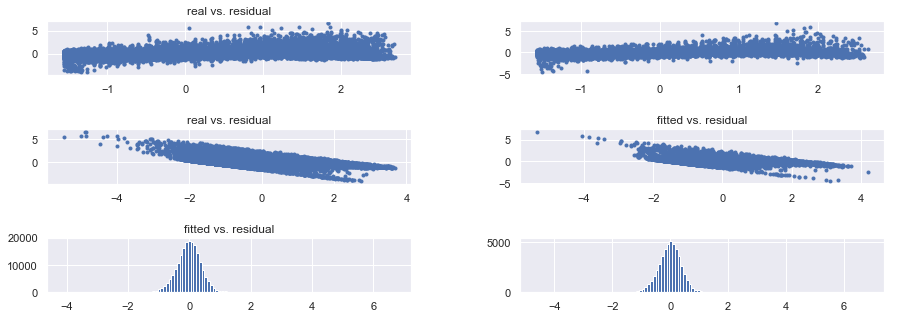

In [57]:
plt.subplots_adjust(hspace = 1,wspace = 0.3)
plt.subplot(3,2,1)
plt.plot(y_train,Residuen_train,'.');
plt.title('real vs. residual') 
plt.subplot(3,2,2)
plt.plot(y_test,Residuen_test,'.');
plt.subplot(3,2,3)
plt.title('real vs. residual') 
plt.plot(y_train_hat,Residuen_train,'.');
plt.subplot(3,2,4)
plt.title('fitted vs. residual') 
plt.plot(y_test_hat,Residuen_test,'.');
plt.subplot(3,2,5)
plt.title('fitted vs. residual') 
plt.hist(Residuen_train,bins = 120);
plt.subplot(3,2,6)
plt.hist(Residuen_test,bins = 120);

Aus dem Plot ist zu entnehmen, dass sich die Ressiduen noch nicht vollständig stochastisch Verhalten. Deshalb lässt sich darauf schliessen, dass das lineare Modell noch nicht ausreicht, um die volle Komplexität der Regressionsaufgabe beschreiben zu können.

## Multivariate Polynominale Regression


Bevor die Polinominale Regression durchgeführt wird, werden die Dimensionen der X-Matrix betrachtet um abzuschätzen, was für ein Grad für das Polynom Sinn ergibt:

In [60]:
print(X_train.shape)

(195040, 314)


Die Matix hat 314 Spalten (Merkmale). Diese Menge führt dazu, dass Python beim Bilden der Polynomkombinationen (PolynomialFeatures) bereits bei der Ordnung 2 in einen "MemoryError" reinläuft. Dehalb wird die Polynomkombination nur auf die nummerschen und die ordinalen Merkmale angewendet, die qualitativen Merkmale werden wie zuvor nur linear berücksichtigt:

Damit der ideale Wert für den Hyperparameter der Polynominale Regression (Ordnung des Polynoms) mit einer Validierungskurve bestimmt werden kann, wurde für das Erstellen der Polynomkombination eine Funktion geschrieben:

In [61]:
from sklearn.preprocessing import PolynomialFeatures
def poly (X_train,X_test,deg):
    num = ['timeOnline','kilometer','powerPS','monthOfRegistration','yearOfRegistration','notRepairedDamage']
    X_train_num_ord = X_train[num]
    X_test_num_ord = X_test[num]
    X_train_nom = X_train.drop(num, axis=1)
    X_test_nom = X_test.drop(num, axis=1)

    poly = PolynomialFeatures(degree=deg, interaction_only=False, include_bias=True)
    X_train_num_ord_poly = pd.DataFrame(poly.fit_transform(X_train_num_ord), index=X_train_nom.index)
    X_test_num_ord_poly = pd.DataFrame(poly.fit_transform(X_test_num_ord), index=X_test_nom.index)

    X_train_poly = pd.concat([X_train_num_ord_poly, X_train_nom], axis=1, join='inner')
    X_test_poly = pd.concat([X_test_num_ord_poly, X_test_nom], axis=1, join='inner')
    X_poly = [X_train_poly,X_test_poly]
    return X_poly #0 = Trainigsdaten, 1 = Testdaten

Nun wird der Hyperparameter variiert und für jeden Hyperparameter eine 10fache Kreuzvalidierung durchgeführt. Anschliessend wird die Validierungskurve geplottet:

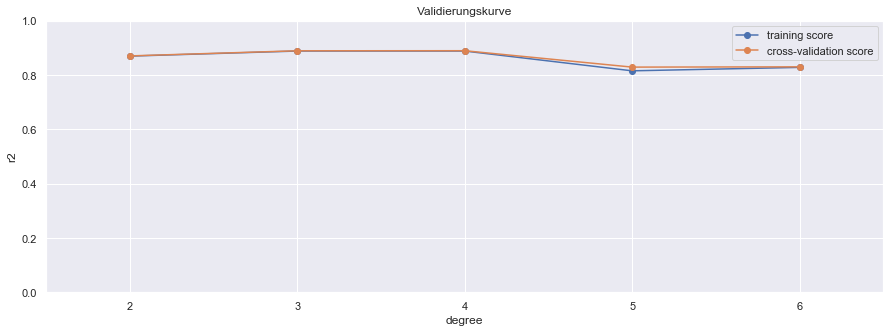

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

r2_cross = [0,0,0,0,0]
r2_train = [0,0,0,0,0]
deg_vec = [2,3,4,5,6]
ii = 0
for deg in range(2,7):
    X_poly = poly (X_train,X_test,deg)
    X = X_poly[0]
    y = y_train
    erg = cross_validate(LinearRegression(fit_intercept=True), X,y, scoring='r2',cv=10)
    r2_cross[ii] = erg['test_score'].mean()
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X,y)
    r2_train[ii] = r2_score(y,lr.predict(X))
    ii = ii+1
else:
    plt.plot(deg_vec,r2_cross,'-o')
    plt.plot(deg_vec,r2_train,'-o')
    plt.xlabel('degree')
    plt.ylabel('r2')
    plt.legend(['training score','cross-validation score'])
    plt.title('Validierungskurve')
    plt.axis([1.5, 6.5 , 0, 1]);

Aus der Validierungskurve folgt, dass der höchste $R^2$-Score bei einem Polynom des Grades 4 resultiert. Dies ist der optimale Wert für den Hyperparameter. Deshalb wird die Polynominale Regression der 4. Ordnung noch auf die Testdaten angewendet:

In [63]:
LR = LinearRegression(fit_intercept=True)
deg = 4
X_poly = poly (X_train,X_test,deg)
LR.fit(X_poly[0],y_train)
y_test_hat_poly = LR.predict(X_poly[1])
print('r2 socre auf den Testdaten:',r2_score(y_test,y_test_hat_poly))

r2 socre auf den Testdaten: 0.8880484687015217


## Random Forest Regressor

Als letzten Regressor wird nun auch noch der `RandomForestRegressor` mit 20 Bäumen ausprobiert. Auch hier wird eine Validierungskurve aufgenommen, bei der der Hyperparameter `max_leaf_nodes`, welcher der maximal erlaubten Anzahl der Blattknoten (Verzweigungen) darstellt, variiert wurde.

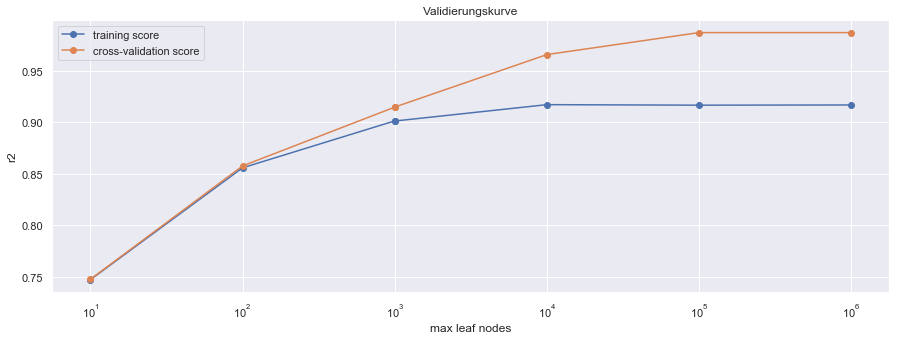

In [64]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor

leaf_nodes = np.array([10,100,1000,1000,10000,100000,1000000])

train_scores, test_scores = validation_curve(RandomForestRegressor(n_estimators=20,n_jobs=-1),X_train,y_train,param_name='max_leaf_nodes',param_range=leaf_nodes,cv=5)
    
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.semilogx(leaf_nodes,test_scores_mean,'-o')
plt.semilogx(leaf_nodes,train_scores_mean,'-o')
plt.xlabel('max leaf nodes')
plt.ylabel('r2')
plt.legend(['training score','cross-validation score'])
plt.title('Validierungskurve')
plt.show()

Aus der Validierungskurve ist ersichtlich, dass sich der cross-validation score ab einem Wert von 10000 Blattknoten  nicht mehr verbessert. Mit diesm Wert wird nun auch noch der $R^2$-Score auf den Testdatensatz bestimmt: 

In [65]:
randf_reg = RandomForestRegressor(n_estimators=20,max_leaf_nodes=10000,n_jobs=-1)
randf_reg.fit(X_train,y_train)
y_test_hat_randf = randf_reg.predict(X_test)
print('r2 socre auf den Testdaten:',r2_score(y_test,y_test_hat_randf))

r2 socre auf den Testdaten: 0.9185303571588648


## Entscheid, Schlussvolgerung und Ausblick

Den besten Score hat der Random Forrest Regressor gezeigt, weshalb dieser als geeignetster Lerner erscheint. Allerdings ist die Polynominale Regression auch sehr nahe an dessen Wert herangekommen. 
Im Allgemeinen kann beobachtet werden, dass sich der R2 Score auf den Test- bzw. Validierungsdaten bei ca. 90% einpendelt und auch mit höherer Komlexität des Lerners nicht über diesen Wert herauskommt.

Eine Erklärung dafür könnte sein, dass in dem Datensatz unter dem Merkmal `model` bei allen Marken nur die häufigsten Modelle separat aufgeführt sind und die restlichen Fahrzeuge den Eintrag `andere` erhalten haben. Da das Modell für die Preise auf dem Gebrauchtwagenmarkt nicht unwichtig ist und nun sehr viele unterschieliche Modelle unter `andere` aufgeführt sind, wird es für den Lerner schwierig, diese Modelle richtig einzuordnen.

Weiterführend könnte man noch untersuchen, welche Merkmale für den Preis am entscheidensten sind. Zudem könnte man beim `RandomForestRegressor` noch andere Hyperparameter, wie beispielsweise die Anzahl verbleibenden Samples pro Blatt, verändert werden, um evtl. noch einen höheren Score zu bekommen.

Ebenfalls könnte der Datensatz so aufbereitet werden, dass bei den Fahrzeugen, welche als Modell den Eintrag `andere` besitzen, die ganaue Modellbezeichnung nachgetragen wird, da diese meist im Merkmal 'name' Vorhanden ist. Ebenfalls interessant wäre auch noch die Bewertung der Fahrzeuge nach Ausstattung, allerdings ist diese im verwendeten Datensatz nicht enthalten.

## Quellenverzeichnis

$1.$ Géron Aurélien, Praxiseinstieg Machine Learning mit Scikit-Learn & TensorFlow, Seite 8 <br>
$2.$ Kaggle: Used cars database ULR: https://www.kaggle.com/orgesleka/used-cars-database#autos.csvkaggle.com, aufgerufen am 07.04.19 <br>
$3.$ Würsch Christoph, Frick Klaus, Unterlagen zu Machine Learning (FS19) auf Moodle